In [1]:
# Load libraries
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.ensemble import RandomForestClassifier




import warnings
warnings.filterwarnings('ignore')


pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

In [2]:
import hvplot.pandas

In [3]:
# load dataset
df = pd.read_csv("Employee_Attrition.csv", header = 0)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,2.146294,Male,93.827486,3.426960,2.464492,Sales Executive,3.397665,Single,6438.949336,20845.103714,7.077818,Y,Yes,9.898765,2.844897,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,3.470803,Male,52.304157,1.813458,1.788697,Research Scientist,1.584059,Married,4457.659622,24877.898697,1.114423,Y,No,NaN,4.120281,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,3.979420,Male,87.271332,1.877226,0.833488,Laboratory Technician,3.301009,Single,2124.545220,2262.942954,5.539591,Y,Yes,15.401596,2.781168,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,3.734705,Female,56.378982,2.932646,1.095372,Research Scientist,3.220844,Married,2771.699080,27189.905714,0.772793,NaN,Yes,9.757546,2.769576,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,1.079412,Male,40.433887,3.117739,0.937746,Laboratory Technician,1.697330,Married,3254.601575,17675.541599,10.118125,NaN,NaN,11.920147,3.282183,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


In [5]:
df.shape

(1470, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,2.715272,6544.718401,14364.334764,2.654394,15.295717,3.149344,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,1.146786,4766.580903,7269.420895,2.508952,3.995702,0.476027,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,0.724192,891.481007,1567.502382,0.000000,7.684723,2.116951,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,1.846039,2961.844066,8138.576694,0.948843,12.195197,2.845502,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,2.895032,4957.070475,14258.293365,1.708812,14.495151,3.064551,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,3.676663,8268.002496,20322.279885,3.959710,17.745736,3.335525,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,5.251277,22858.020388,32751.715800,10.855733,29.797261,5.013371,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


In [8]:
df.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [9]:
df.duplicated().sum()

0

In [10]:
df=df.round(0)


In [11]:
# List of columns with float64 dtype
float_columns = df.select_dtypes(include='float64').columns.tolist()

# Replace non-finite values (NaN, inf) with a suitable value, e.g., 0
df[float_columns] = df[float_columns].replace([np.inf, -np.inf, np.nan], 0)

# Convert float64 columns to int
df[float_columns] = df[float_columns].astype(int)

# List of columns with object dtype
object_columns = df.select_dtypes(include='object').columns.tolist()

# Handle non-numeric values in object columns
for col in object_columns:
    # Replace 'Yes' with 1 and 'No' with 0 (adjust as needed)
    df[col] = df[col].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)

# Display the DataFrame with converted dtypes
print(df)

      Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      42          1               0        990           0                 1   
1      52          0               0        277           0                 0   
2      33          1               0       1204           0                 2   
3      35          0               0       1353           0                 3   
4      25          0               0        485           0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   37          0               0        914           0                22   
1466   35          0               0        575           0                 6   
1467   27          0               0        152           0                 0   
1468    0          0               0        996           0                 2   
1469   38          0               0        704           0                 7   

      Education  EducationF

Rounded up all the values because they were float

In [12]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,42,1,0,990,0,1,2,0,1,1,2,0,94,3,2,0,3,0,6439,20845,7,0,1,10,3,1,96,0,8,0,1,6,4,0,5
1,52,0,0,277,0,0,1,0,1,2,3,0,52,2,2,0,2,0,4458,24878,1,0,0,0,4,4,85,1,9,3,3,10,8,1,6
2,33,1,0,1204,0,2,2,0,1,4,4,0,87,2,1,0,3,0,2125,2263,6,0,1,15,3,2,76,0,8,3,3,0,0,0,0
3,35,0,0,1353,0,3,4,0,1,5,4,0,56,3,1,0,3,0,2772,27190,1,0,1,10,3,3,76,0,8,3,3,8,6,3,0
4,25,0,0,485,0,2,1,0,0,7,1,0,40,3,1,0,2,0,3255,17676,10,0,0,12,3,0,73,1,6,3,3,2,2,2,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [14]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print(" ")

Age: Number of unique values 54
 
Attrition: Number of unique values 2
 
BusinessTravel: Number of unique values 1
 
DailyRate: Number of unique values 867
 
Department: Number of unique values 1
 
DistanceFromHome: Number of unique values 34
 
Education: Number of unique values 7
 
EducationField: Number of unique values 1
 
EmployeeCount: Number of unique values 2
 
EmployeeNumber: Number of unique values 993
 
EnvironmentSatisfaction: Number of unique values 6
 
Gender: Number of unique values 1
 
HourlyRate: Number of unique values 95
 
JobInvolvement: Number of unique values 6
 
JobLevel: Number of unique values 7
 
JobRole: Number of unique values 1
 
JobSatisfaction: Number of unique values 6
 
MaritalStatus: Number of unique values 1
 
MonthlyIncome: Number of unique values 1247
 
MonthlyRate: Number of unique values 1288
 
NumCompaniesWorked: Number of unique values 12
 
Over18: Number of unique values 1
 
OverTime: Number of unique values 2
 
PercentSalaryHike: Number of uniq

In [15]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

the dropped features aren't useful because have only 1 unique value and employee number is individual so Im going to dro it

In [16]:
df.isnull().values.any()

False

In [17]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [18]:
df.shape

(1470, 31)

In [19]:
object_col = []

for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print(" ")

if 'Attrition' in object_col:
    object_col.remove('Attrition')

# Now object_col should not contain 'Attrition'
print(object_col)


[]


In [20]:
len(object_col)

0

In [21]:
label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [22]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print(" ")
disc_col.remove('Attrition')

Attrition : [1 0]
 
BusinessTravel : [0]
 
Department : [0]
 
Education : [2 1 4 0 3 5 6]
 
EducationField : [0]
 
EnvironmentSatisfaction : [2 3 4 1 0 5]
 
Gender : [0]
 
JobInvolvement : [3 2 4 5 0 1]
 
JobLevel : [2 1 3 0 4 5 6]
 
JobRole : [0]
 
JobSatisfaction : [3 2 0 5 1 4]
 
MaritalStatus : [0]
 
NumCompaniesWorked : [ 7  1  6 10  0  4  2  5  3  9  8 11]
 
OverTime : [1 0]
 
PercentSalaryHike : [10  0 15 12 13 19 21 11 17  8 23 20 14 16  9 24 18 22 28 25 27 26 29 30]
 
PerformanceRating : [3 4 2 0 5]
 
RelationshipSatisfaction : [1 4 2 3 0 5]
 
StockOptionLevel : [0 1 3 2]
 
TrainingTimesLastYear : [0 3 2 5 1 4 6 7 8]
 
WorkLifeBalance : [1 3 2 0 5 4]
 
YearsInCurrentRole : [ 4  8  0  6  2  7  3 14  1 15  5 13 12 10 11  9 17 18 16 19]
 
YearsSinceLastPromotion : [ 0  1  3  2  4  8  7  5 17  9  6 13 11 10 16 14 12 15]
 
YearsWithCurrManager : [ 5  6  0  2  7  3  9  8 10 18  1 12  4 11 15 14 16 13 20]
 


In [23]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print(" ")

Age : Minimum: 0, Maximum: 69
 
DailyRate : Minimum: 0, Maximum: 1784
 
DistanceFromHome : Minimum: 0, Maximum: 34
 
HourlyRate : Minimum: 0, Maximum: 123
 
MonthlyIncome : Minimum: 0, Maximum: 22858
 
MonthlyRate : Minimum: 0, Maximum: 32752
 
TotalWorkingYears : Minimum: 0, Maximum: 48
 
YearsAtCompany : Minimum: 0, Maximum: 37
 


In [24]:
df.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, width=600, height=300, bins=30)


:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (DistanceFromHome_count)

In [25]:
df.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [Education]   (Education_count)

In [26]:
df.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [RelationshipSatisfaction]   (RelationshipSatisfaction_count)

In [27]:
df.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (EnvironmentSatisfaction_count)

In [28]:
df.hvplot.hist(y='JobInvolvement', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobInvolvement]   (JobInvolvement_count)

In [29]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (JobLevel_count)

In [30]:
df.hvplot.hist(y='JobSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (JobSatisfaction_count)

In [31]:
df.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (NumCompaniesWorked_count)

In [32]:
df.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (PercentSalaryHike_count)

In [33]:
df.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [StockOptionLevel]   (StockOptionLevel_count)

In [34]:
df.hvplot.hist(y='TrainingTimesLastYear', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [TrainingTimesLastYear]   (TrainingTimesLastYear_count)

In [35]:
df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [Age]   (Age_count)

In [36]:
df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (MonthlyIncome_count)

In [37]:
df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (YearsAtCompany_count)

In [38]:
df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (TotalWorkingYears_count)

When JobLevel. MonthlyIncome and YearAtCompany are lower those employees are more likely to quit there jobs.
BusinessTravel : The workers who travel alot are more likely to quit then other employees.

Department : The worker in Research & Development are more likely to stay then the workers on other departement.

EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

OverTime : The workers who work more hours are likely to quit then others.

In [39]:
for column in df.columns:
    if df[column].dtype == 'O':  # Check if the column has object (string) dtype
        df[column] = pd.to_numeric(df[column], errors='coerce')

print(df)


      Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      42          1               0        990           0                 1   
1      52          0               0        277           0                 0   
2      33          1               0       1204           0                 2   
3      35          0               0       1353           0                 3   
4      25          0               0        485           0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   37          0               0        914           0                22   
1466   35          0               0        575           0                 6   
1467   27          0               0        152           0                 0   
1468    0          0               0        996           0                 2   
1469   38          0               0        704           0                 7   

      Education  EducationF

<Axes: >

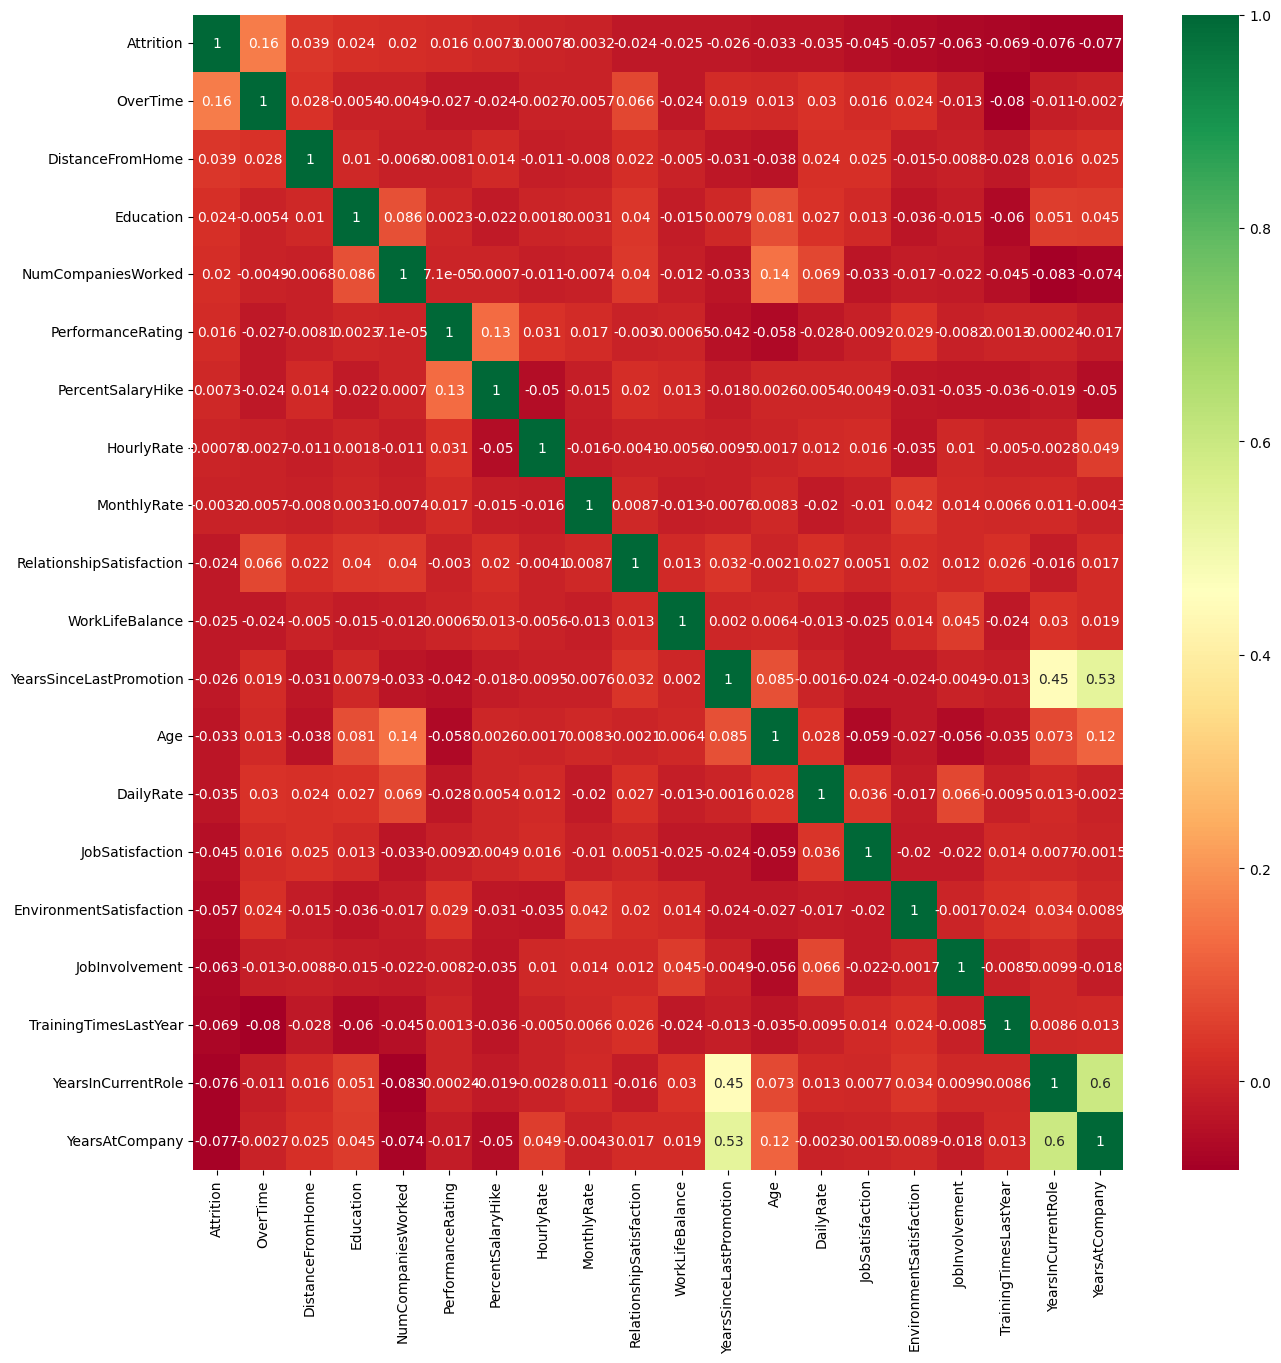

In [40]:
col = df.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(df[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

In [41]:
df.drop('Attrition', axis=1).corrwith(df.Attrition).hvplot.barh()

:Bars   [index]   (0)

Job level is highy correlated with monthly income
job level and working hours are correlated
monthly income is correlated with working hours
age is positive correlated with total working hours
maritial status and stocks are negatively correlated

In [42]:
# Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 110 entries, Age to YearsWithCurrManager_20
dtypes: int64(11), uint8(99)
memory usage: 268.6 KB


In [43]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 110)
(1470, 110)


<Axes: >

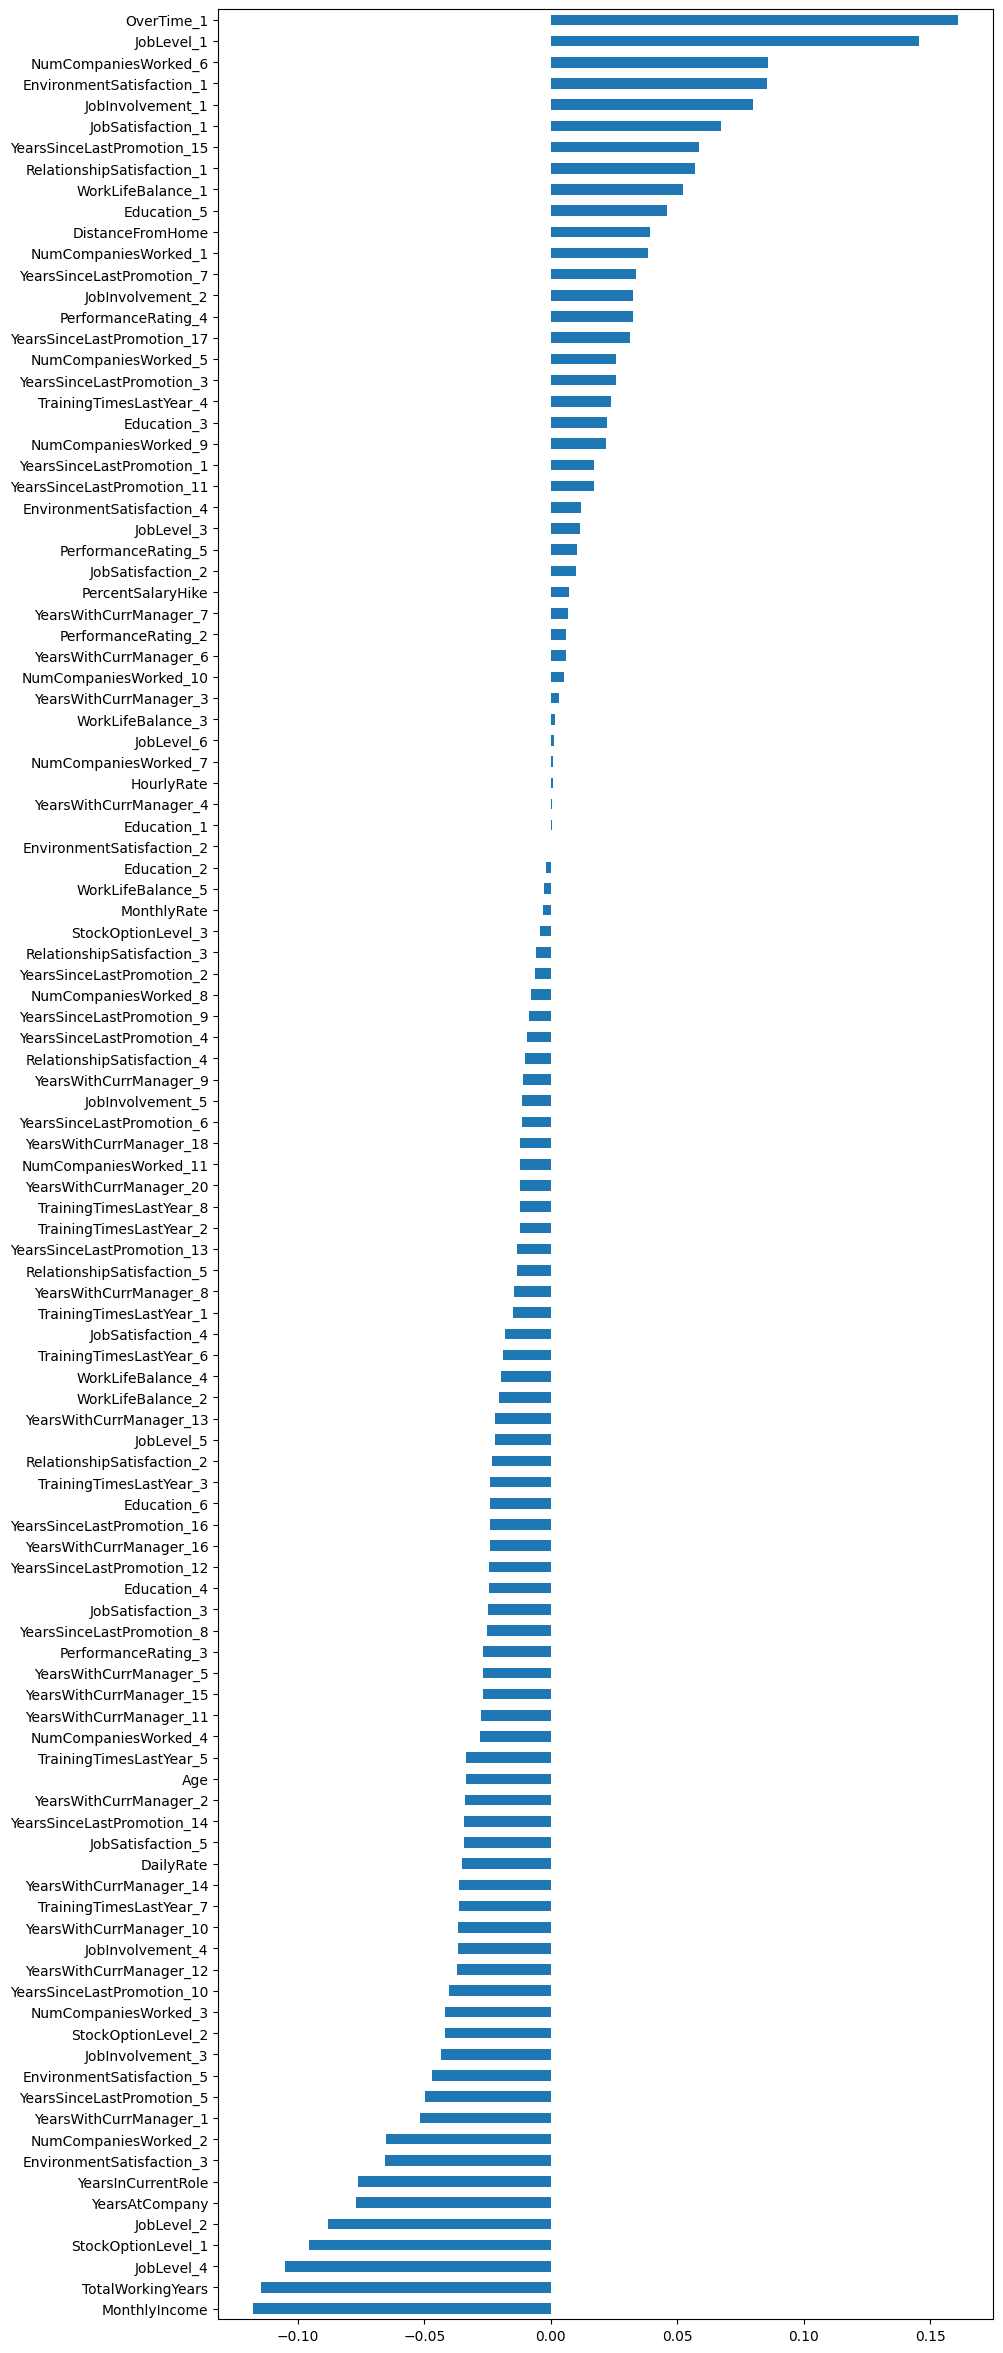

In [44]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [45]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

65

In [46]:
X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [47]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [48]:
y_test.value_counts()[0] / y_test.shape[0]

0.8253968253968254

In [49]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("TRAINING")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("==TESTING")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

TRAINING
Staying Rate: 82.41%
Leaving Rate: 17.59%
==TESTING
Staying Rate: 82.54%
Leaving Rate: 17.46%


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("Training Result: ")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"Confusion Matrix:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"Accuracy score:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Classification report:\n{clf_report}")

    print("Testing Result: ")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"Accuracy score:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Classification report:\n{clf_report}")

In [51]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)

Training Result: 
Confusion Matrix:
[[826  22]
 [131  50]]
Accuracy score:
0.8513
Classification report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.863114    0.694444  0.851312     0.778779      0.833445
recall       0.974057    0.276243  0.851312     0.625150      0.851312
f1-score     0.915235    0.395257  0.851312     0.655246      0.823772
support    848.000000  181.000000  0.851312  1029.000000   1029.000000
Testing Result: 
Confusion Matrix:
[[349  15]
 [ 68   9]]
Accuracy score:
0.8118
Classification report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.836930   0.375000  0.811791    0.605965      0.756276
recall       0.958791   0.116883  0.811791    0.537837      0.811791
f1-score     0.893726   0.178218  0.811791    0.535972      0.768796
support    364.000000  77.000000  0.811791  441.000000    441.000000


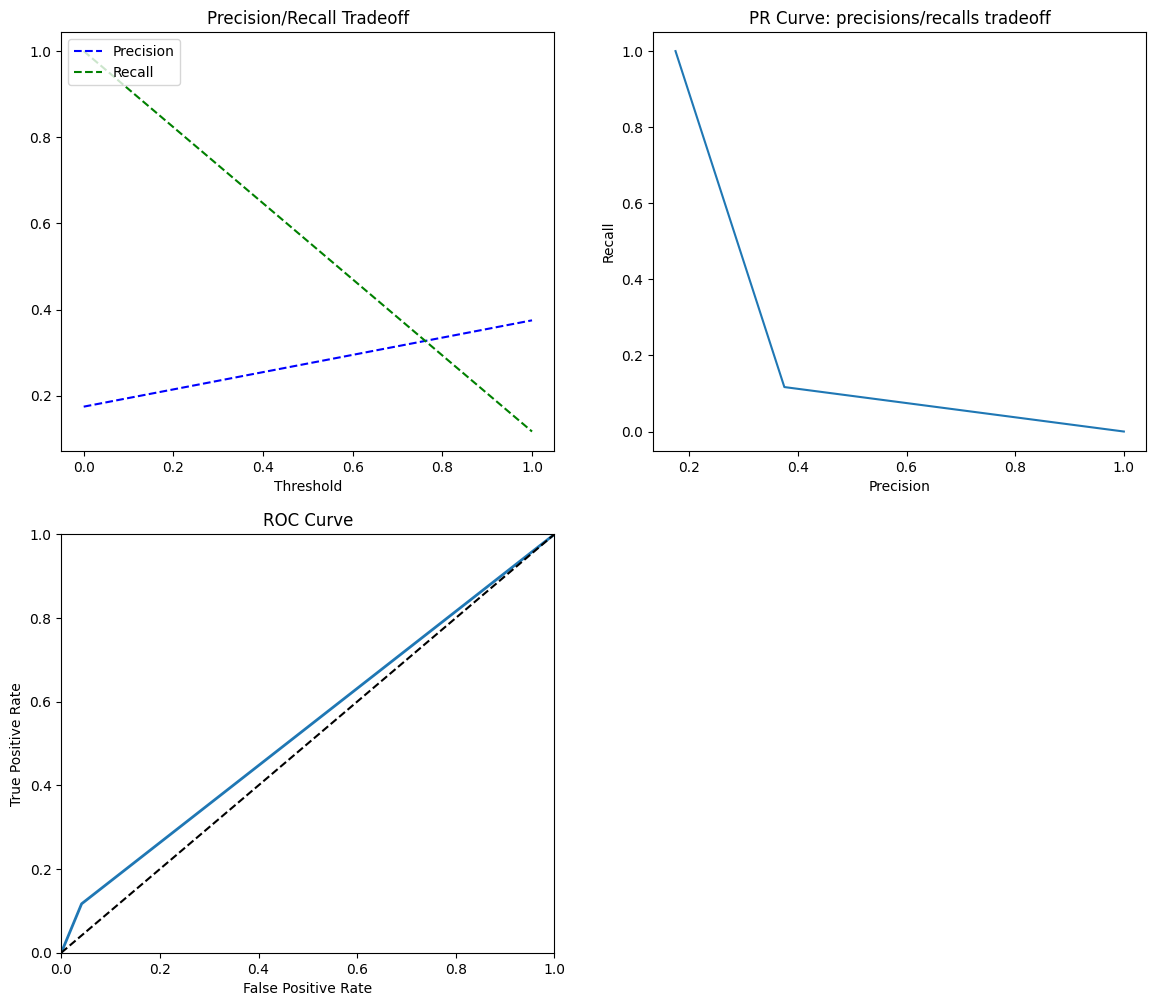

In [52]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [53]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

In [54]:
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False,
#                                      class_weight={0:stay, 1:leave}
                                    )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

Training Result: 
Confusion Matrix:
[[848   0]
 [  0 181]]
Accuracy score:
1.0000
Classification report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    848.0  181.0       1.0     1029.0        1029.0
Testing Result: 
Confusion Matrix:
[[361   3]
 [ 75   2]]
Accuracy score:
0.8231
Classification report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.827982   0.400000  0.823129    0.613991      0.753255
recall       0.991758   0.025974  0.823129    0.508866      0.823129
f1-score     0.902500   0.048780  0.823129    0.475640      0.753438
support    364.000000  77.000000  0.823129  441.000000    441.000000


In [55]:
param_grid = dict(
    n_estimators= [100, 500, 900], 
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15, None], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4], 
    bootstrap= [True, False]
)

rf_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)

rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Training Result: 
Confusion Matrix:
[[848   0]
 [178   3]]
Accuracy score:
0.8270
Classification report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.826511    1.000000  0.827017     0.913255      0.857027
recall       1.000000    0.016575  0.827017     0.508287      0.827017
f1-score     0.905016    0.032609  0.827017     0.468812      0.751560
support    848.000000  181.000000  0.827017  1029.000000   1029.000000
Testing Result: 
Confusion Matrix:
[[364   0]
 [ 77   0]]
Accuracy score:
0.8254
Classification report:
                    0     1  accuracy   macro avg  weighted avg
precision    0.825397   0.0  0.825397    0.412698      0.681280
recall       1.000000   0.0  0.825397    0.500000      0.825397
f1-score     0.904348   0.0  0.825397    0.452174      0.746446
support    364.000000  77.0  0.825397  441.000000    441.000000


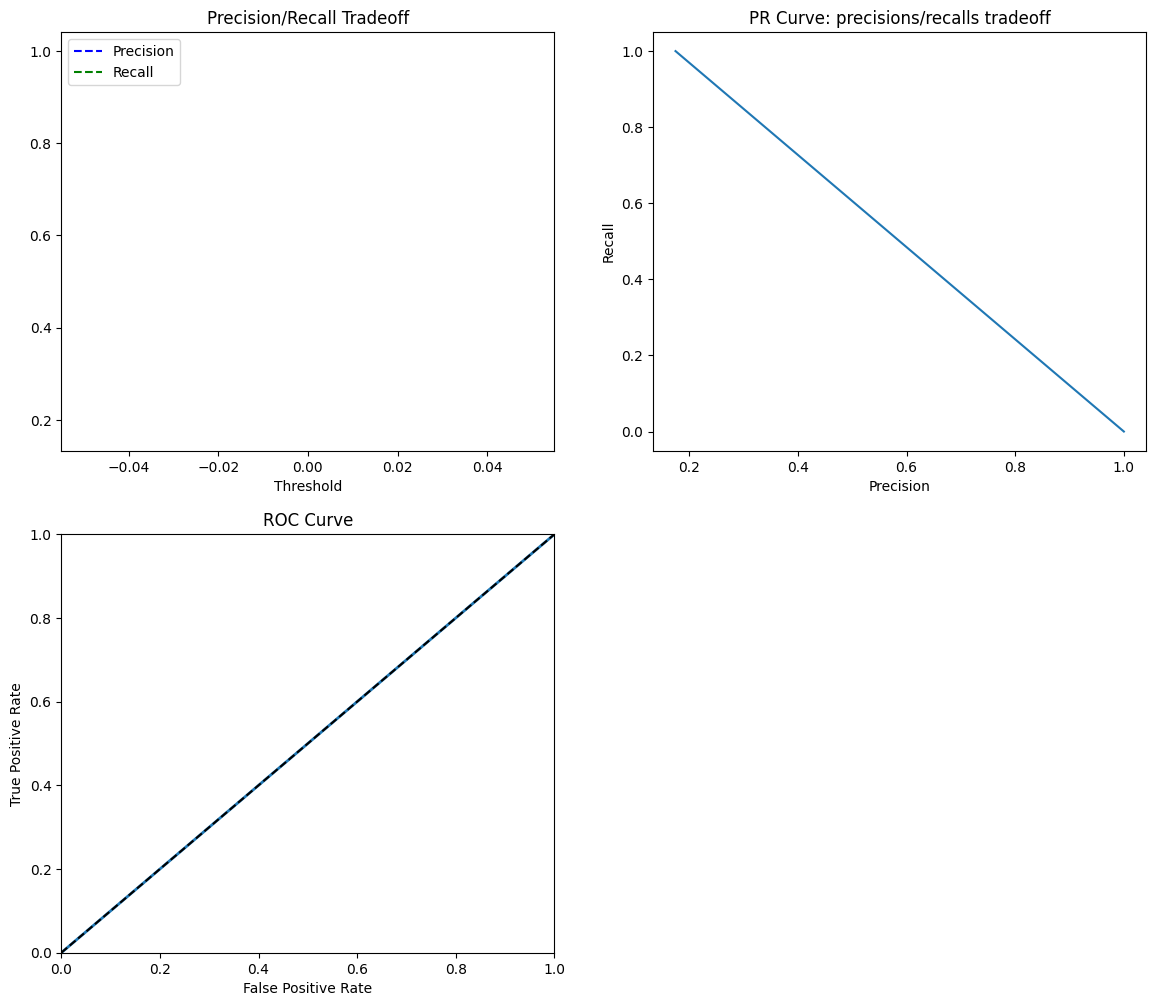

In [56]:
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [58]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

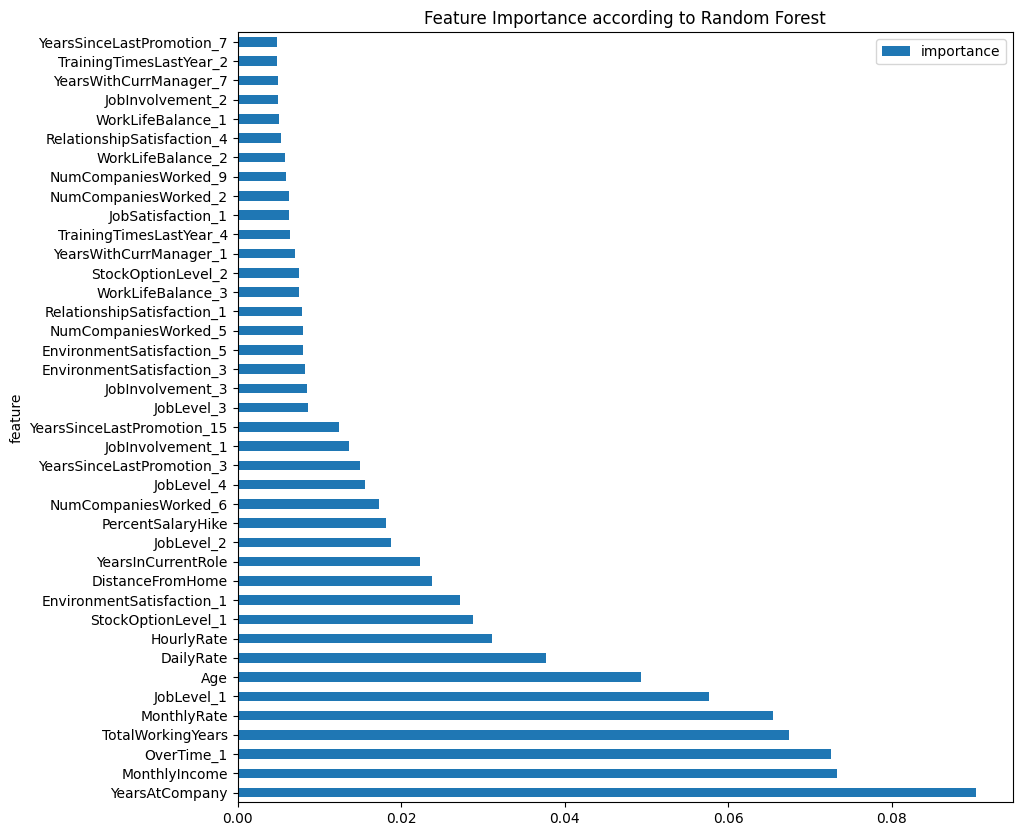

In [59]:
df = feature_imp(X, rf_clf)[:40]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 10))
plt.title('Feature Importance according to Random Forest')

In [60]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)

Training Result: 
Confusion Matrix:
[[847   1]
 [179   2]]
Accuracy score:
0.8251
Classification report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.825536    0.666667  0.825073     0.746101      0.797591
recall       0.998821    0.011050  0.825073     0.504935      0.825073
f1-score     0.903949    0.021739  0.825073     0.462844      0.748769
support    848.000000  181.000000  0.825073  1029.000000   1029.000000
Testing Result: 
Confusion Matrix:
[[364   0]
 [ 77   0]]
Accuracy score:
0.8254
Classification report:
                    0     1  accuracy   macro avg  weighted avg
precision    0.825397   0.0  0.825397    0.412698      0.681280
recall       1.000000   0.0  0.825397    0.500000      0.825397
f1-score     0.904348   0.0  0.825397    0.452174      0.746446
support    364.000000  77.0  0.825397  441.000000    441.000000


In [61]:
svm_clf = SVC(random_state=42)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

search = GridSearchCV(svm_clf, param_grid=param_grid, scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=1)

In [62]:
svm_clf = SVC(**search.best_params_)
svm_clf.fit(X_train_std, y_train)

evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)


Training Result: 
Confusion Matrix:
[[847   1]
 [179   2]]
Accuracy score:
0.8251
Classification report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.825536    0.666667  0.825073     0.746101      0.797591
recall       0.998821    0.011050  0.825073     0.504935      0.825073
f1-score     0.903949    0.021739  0.825073     0.462844      0.748769
support    848.000000  181.000000  0.825073  1029.000000   1029.000000
Testing Result: 
Confusion Matrix:
[[364   0]
 [ 77   0]]
Accuracy score:
0.8254
Classification report:
                    0     1  accuracy   macro avg  weighted avg
precision    0.825397   0.0  0.825397    0.412698      0.681280
recall       1.000000   0.0  0.825397    0.500000      0.825397
f1-score     0.904348   0.0  0.825397    0.452174      0.746446
support    364.000000  77.0  0.825397  441.000000    441.000000


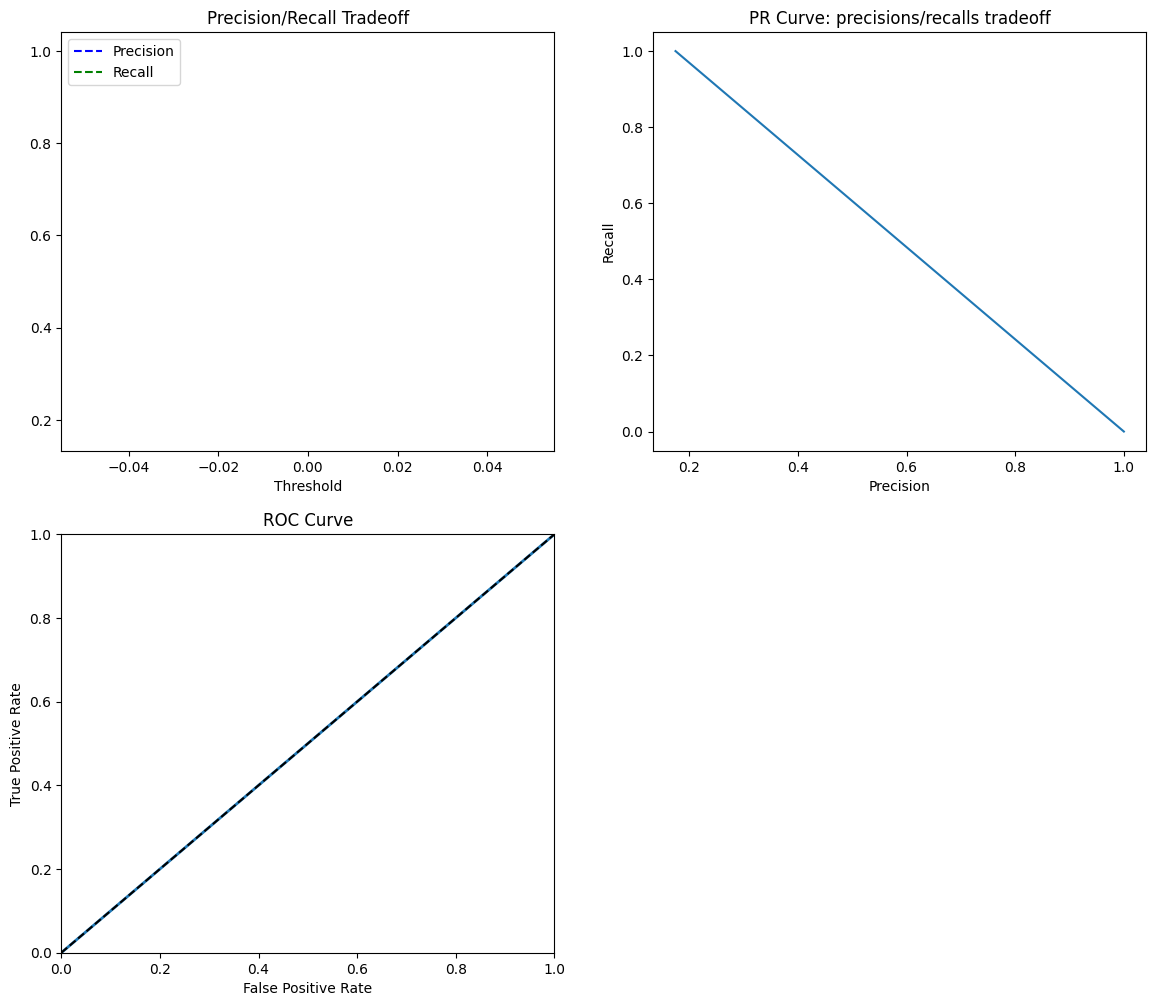

In [64]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, svm_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [65]:
scores_dict['Support Vector Machine'] = {
        'Train': roc_auc_score(y_train, svm_clf.predict(X_train_std)),
        'Test': roc_auc_score(y_test, svm_clf.predict(X_test_std)),
    }

In [70]:
import xgboost as xgb

from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

Training Result: 
Confusion Matrix:
[[848   0]
 [  0 181]]
Accuracy score:
1.0000
Classification report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    848.0  181.0       1.0     1029.0        1029.0
Testing Result: 
Confusion Matrix:
[[350  14]
 [ 69   8]]
Accuracy score:
0.8118
Classification report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.835322   0.363636  0.811791    0.599479      0.752964
recall       0.961538   0.103896  0.811791    0.532717      0.811791
f1-score     0.893997   0.161616  0.811791    0.527807      0.766121
support    364.000000  77.000000  0.811791  441.000000    441.000000


In [72]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

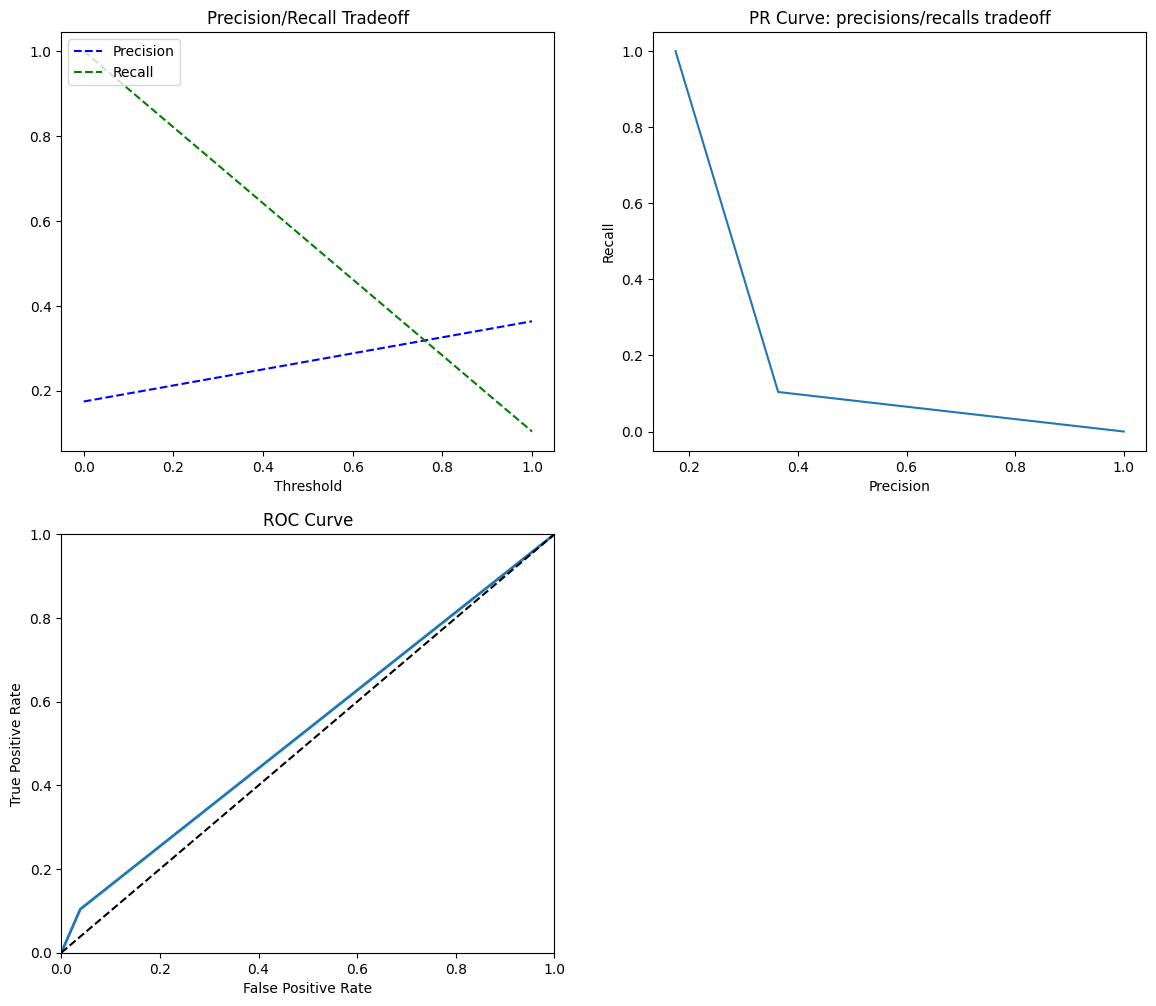

In [73]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

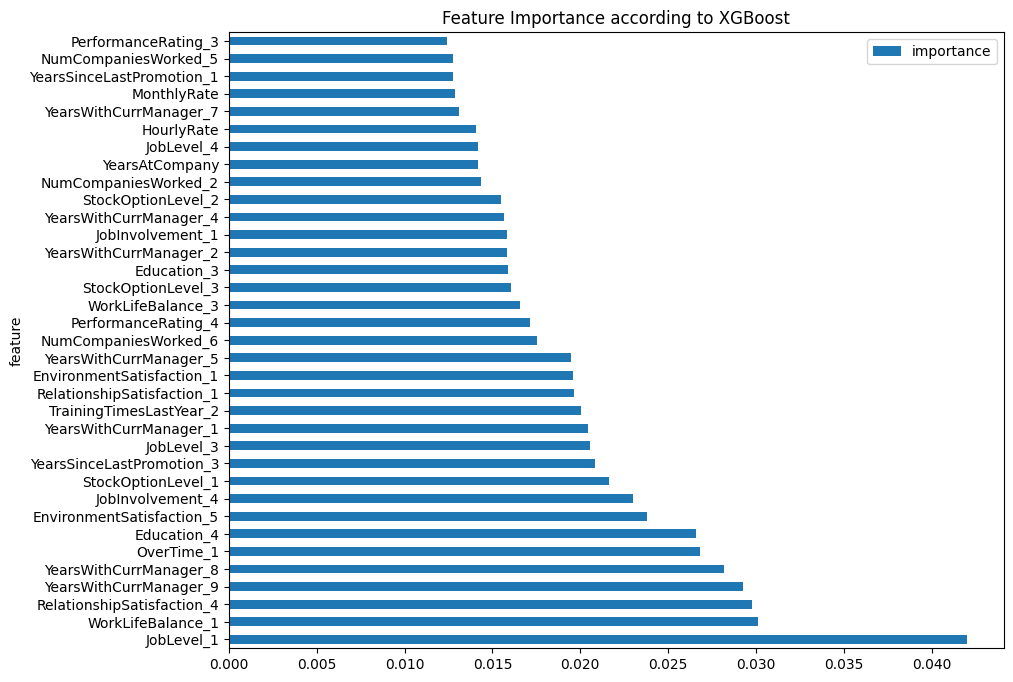

In [74]:
df = feature_imp(X, xgb_clf)[:35]
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

In [77]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'Logistic Regression': lr_clf,
    'Support Vector Machine': svm_clf,
   
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.500
XGBOOST                        roc_auc_score: 0.533
LOGISTIC REGRESSION            roc_auc_score: 0.529
SUPPORT VECTOR MACHINE         roc_auc_score: 0.500


In [78]:
scores_df = pd.DataFrame(scores_dict)
# scores_df.plot(kind='barh', figsize=(15, 8))
scores_df.hvplot.barh()

:Bars   [index,Variable]   (value)